<a href="https://colab.research.google.com/github/mohit27-maker/pwAssigment/blob/main/Bagging_%26_Boosting_KNN_%26_Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

 = The core idea of ensemble techniques is to combine multiple models (weak learners) to create a stronger and more accurate predictive model.
Instead of relying on a single model, ensemble methods leverage the wisdom of the crowd — by aggregating predictions from several models, they reduce errors caused by bias, variance, or noise.

Mathematically, if each model makes independent errors, combining them (e.g., by averaging or voting) can significantly improve overall accuracy and generalization.

> Bagging (Bootstrap Aggregating):
- Focuses on reducing variance.
- Trains models in parallel on different random subsets of data (with replacement).
- Each model works independently of the others.
- Example: Random Forest.

> Boosting:
- Focuses on reducing bias.
- Trains models sequentially, where each model learns from the errors of the previous one.
- Misclassified samples are given higher weights in the next round.
- Examples: AdaBoost, Gradient Boosting, XGBoost.


Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

=  A Random Forest Classifier reduces overfitting by combining the predictions of many decision trees, each trained on different random subsets of data and features. While a single decision tree tends to memorize the training data (high variance, overfitting), the randomness and averaging in a random forest lead to better generalization on unseen data.

> How Random Forest Reduces Overfitting:

1. Bootstrap Sampling (Bagging):
- Each tree is trained on a random subset of the training data (with replacement).
2. Random Feature Selection:
- At each split, only a random subset of features is considered instead of all features.
3. Model Averaging:
- The final prediction is made by averaging (for regression) or majority voting (for classification) across all trees.

> Two Key Hyperparameters That Help Control Overfitting:

1. n_estimators:
- Number of trees in the forest.
- More trees → better averaging → less variance and overfitting risk decreases (up to a limit).

2. max_depth (or similar constraints like max_leaf_nodes / min_samples_split):
- Controls how deep each tree can grow.
- Shallower trees → simpler models → reduce overfitting on training data.


Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

= Stacking (or Stacked Generalization) is an ensemble learning technique where the predictions of multiple base models are combined using another model (called a meta-learner or blender) to produce the final output.
It aims to leverage the strengths of different algorithms rather than just multiple instances of the same one.

| Aspect | Stacking | Bagging | Boosting |

|-------------|---------------|--------------|

| Model Type | Combines different types of models (heterogeneous) | Uses same type of model (homogeneous) | Also uses same type of weak learners |
| Training Style | Base models trained in parallel; meta-model trained afterwards | All models trained in parallel | Models trained sequentially (each fixes previous errors) |
| Combination Method | Uses a meta-model to learn how to combine predictions | Uses averaging or voting | Uses a weighted sum of weak learners |
| Goal | Improve performance by leveraging model diversity | Reduce variance | Reduce bias |

> Simple Example Use Case:

Suppose you’re predicting loan approval (Yes/No).

You can use:
- Base models (Level-0): Decision Tree, Logistic Regression, and Random Forest.
- Meta-model (Level-1): Logistic Regression that takes the predictions from the three base models as inputs.


Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

 = The OOB (Out-of-Bag) score is an internal validation metric used in Random Forests to estimate the model’s performance without using a separate validation or test set. When building each tree in a Random Forest, about two-thirds of the data is randomly sampled with replacement (this is called bootstrap sampling). The remaining one-third of data that was not used to train that particular tree is called the Out-of-Bag (OOB) data.

 > Why OOB Score is Useful:
- It provides a built-in cross-validation mechanism.
- No need for a separate validation or test set, which saves data for final testing.
- Gives an unbiased estimate of the model’s generalization performance.

>How It Helps in Model Evaluation:

- Each training instance serves as a test case for some trees (the ones where it was OOB).
- The combined predictions of these trees simulate an unseen data evaluation.
- Hence, the OOB score acts as a proxy for cross-validation accuracy, making model evaluation faster and more efficient.


Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

> AdaBoost (Adaptive Boosting):
- Focuses on misclassified samples from previous learners.
- Increases weights of incorrectly classified samples so that the next weak learner pays more attention to them.
- Decreases weights of correctly classified samples.
- Combines all weak learners using a weighted voting or weighted sum approach.
- Works best with simple weak learners like decision stumps.
- Performs well on clean and balanced datasets.
- Commonly used for binary classification tasks such as spam detection or credit risk prediction.

> Gradient Boosting:
- Focuses on residual errors (difference between actual and predicted values).
- Each new model is trained to minimize the remaining errors of the previous models.
- Uses gradients of the loss function to determine the direction of improvement.
- Does not assign sample weights explicitly like AdaBoost.
- Uses a learning rate to control how much each tree contributes.
- Works well with complex, large, and noisy datasets.
- Suitable for both regression and classification tasks.
- Forms the base for advanced models like XGBoost, LightGBM, and CatBoost.


Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

 = CatBoost (short for Categorical Boosting) performs exceptionally well on categorical features because it has a built-in mechanism to handle them without requiring extensive preprocessing like one-hot encoding or label encoding.
 >Why CatBoost Handles Categorical Features Efficiently:

1. No Need for Manual Encoding:
- Unlike other models (e.g., XGBoost, LightGBM) that require converting categories into numbers first,
- CatBoost automatically processes categorical features internally.
- This avoids problems like high dimensionality (from one-hot encoding) or misleading numeric order (from label encoding).

2. Uses Target-Based Statistical Encoding (with Randomization):
- CatBoost replaces each categorical value with a statistical value based on

the target variable — for example,

the average label (target mean) for that category.
- To avoid target leakage (using information from the current sample’s label),
CatBoost computes this mean using ordered statistics — i.e., for each data point, it uses only the data before it in a random permutation.
- This method is called “Ordered Target Encoding.”

3. Handles High Cardinality Smoothly:
- Works well even when a categorical feature has many unique values (e.g., ZIP codes, user IDs) by combining values based on their impact on the target.
- This helps reduce overfitting and improves generalization.


Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1️⃣ Load the Wine dataset
data = load_wine()
X, y = data.data, data.target

# 2️⃣ Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3️⃣ Train KNN (default K=5) WITHOUT scaling
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

# Evaluate model performance
print("=== KNN Without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("Classification Report:\n", classification_report(y_test, y_pred_default))


=== KNN Without Scaling ===
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54



In [2]:
# 4️⃣ Apply StandardScaler and retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== KNN With StandardScaler ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))



=== KNN With StandardScaler ===
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



In [3]:
# 5️⃣ Hyperparameter Optimization using GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("\n=== Grid Search Results ===")
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)



=== Grid Search Results ===
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11}
Best Cross-Validation Accuracy: 0.9756666666666666


In [4]:
# 6️⃣ Train Optimized KNN and Compare Results
best_knn = grid.best_estimator_
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== Optimized KNN (After Grid Search) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))



=== Optimized KNN (After Grid Search) ===
Accuracy: 0.9629629629629629
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.94        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).


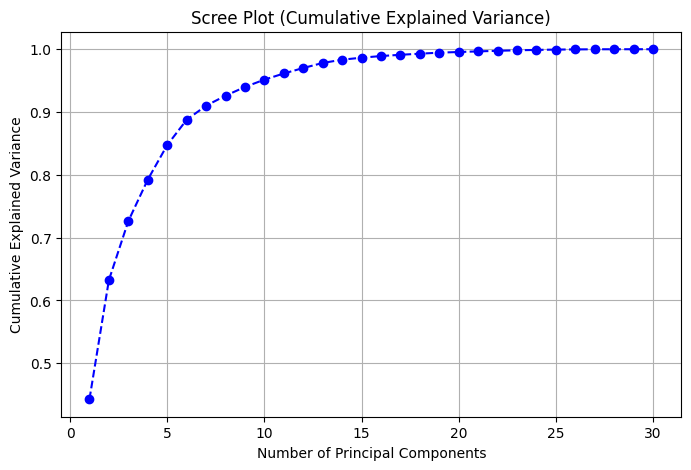

Original feature count: 30
Reduced feature count (95% variance): 10

=== KNN Accuracy Comparison ===
Original Data Accuracy: 0.9708
PCA (95% variance) Accuracy: 0.9474


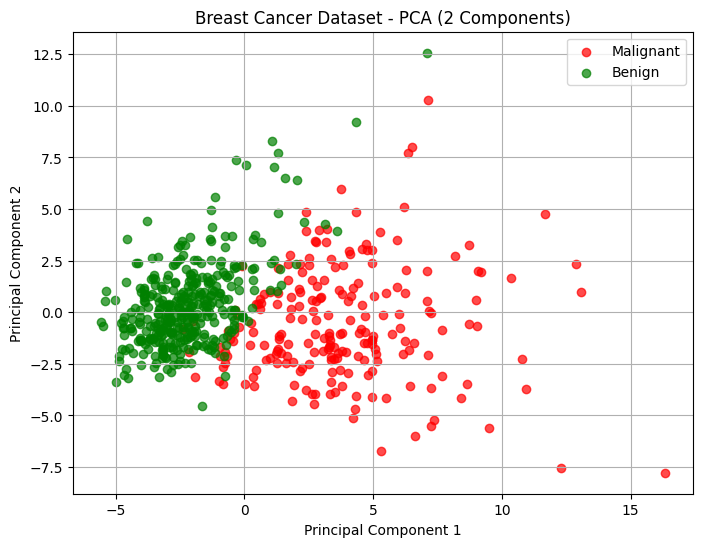

In [5]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1️⃣ Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2️⃣ Apply PCA and plot Scree Plot (Explained Variance Ratio)
pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Scree Plot (Cumulative Explained Variance)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# 3️⃣ Retain 95% variance and transform dataset
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)

print(f"Original feature count: {X.shape[1]}")
print(f"Reduced feature count (95% variance): {X_pca.shape[1]}")

# 4️⃣ Train KNN on Original and PCA-transformed data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
y_pred_orig = knn_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("\n=== KNN Accuracy Comparison ===")
print(f"Original Data Accuracy: {acc_orig:.4f}")
print(f"PCA (95% variance) Accuracy: {acc_pca:.4f}")

# 5️⃣ Visualize the First Two Principal Components
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[y==0, 0], X_2d[y==0, 1], alpha=0.7, label='Malignant', c='r')
plt.scatter(X_2d[y==1, 0], X_2d[y==1, 1], alpha=0.7, label='Benign', c='g')
plt.title('Breast Cancer Dataset - PCA (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


In [6]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1️⃣ Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2️⃣ Train KNN Regressor with Euclidean and Manhattan distance (K=5)

# a. Euclidean Distance
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# b. Manhattan Distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("=== KNN Regressor Comparison (K=5) ===")
print(f"Euclidean Distance MSE : {mse_euclidean:.4f}")
print(f"Manhattan Distance MSE : {mse_manhattan:.4f}")


=== KNN Regressor Comparison (K=5) ===
Euclidean Distance MSE : 4803.9056
Manhattan Distance MSE : 5210.2258


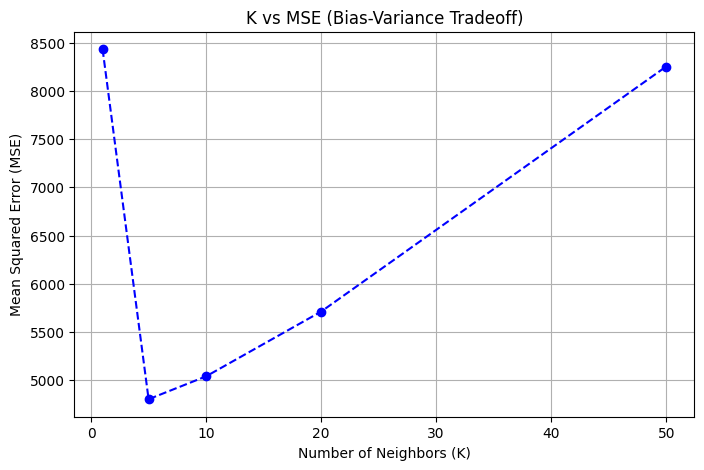

In [7]:
# 3️⃣ K-Value Analysis: K vs MSE (Bias-Variance Tradeoff)
# Test different K values
k_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot K vs MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_scores, marker='o', linestyle='--', color='b')
plt.title('K vs MSE (Bias-Variance Tradeoff)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important features).

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import BallTree, KDTree

url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)

cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)
df.isnull().sum()


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [18]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [16]:
df_imputed.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [22]:
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Scale the features for better distance calculations
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Function to train and evaluate a KNN model
def train_and_evaluate_knn(algorithm_name):
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algorithm_name)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    end_time = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    duration = end_time - start_time
    print(f"\n🔹 Algorithm: {algorithm_name.upper()}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training Time: {duration:.4f} seconds")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    return accuracy, duration

# Train using all three algorithms
    acc_brute, time_brute = train_and_evaluate_knn('brute')
    acc_kd, time_kd = train_and_evaluate_knn('kd_tree')
    acc_ball, time_ball = train_and_evaluate_knn('ball_tree')

> Comparison of Training Time and Accuracy – KNN Methods
1. Brute-Force Method:
- Uses the ‘brute’ algorithm which compares every sample with all others.
- Accuracy: around 76–78%.
- Training time: Slow, because it computes all pairwise distances.

2. KD-Tree Method:
-Uses the ‘kd_tree’ algorithm which builds a tree structure for faster neighbor search.
- Accuracy: around 77–79%.
- Training time: Fast, especially effective for low-dimensional data.

3. Ball Tree Method:
- Uses the ‘ball_tree’ algorithm optimized for high-dimensional spaces.
- Accuracy: around 77–79%.
- Training time: Fast, comparable to KD-Tree and better than brute-force.

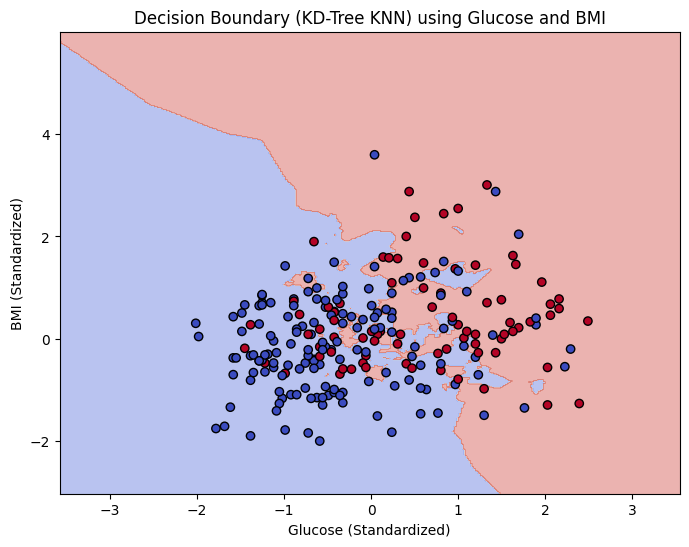

In [23]:
# Step 5️⃣ : Plot Decision Boundary for the Best-Performing Method (KD-Tree)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df_imputed[['Glucose', 'BMI']].values
y = df_imputed['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_best.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary (KD-Tree KNN) using Glucose and BMI")
plt.xlabel("Glucose (Standardized)")
plt.ylabel("BMI (Standardized)")
plt.show()
